## linear fit

<img src='linear_regression.png' style='width:450px'>


## main equations
\begin{align}
y &= a \cdot x + b \\
b &= \bar{y} - \bar{x} a \\
a &= \frac{\frac{1}{n}\sum x_i y_i - \bar{x} \bar{y}}{\bar{s}-\bar{x}^2}
\end{align}

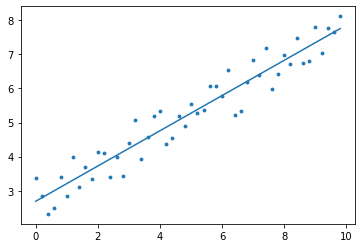

In [18]:
#data
x = np.arange(0,10,0.2)
y = 0.5*x + 2 + 1.5*np.random.rand(x.shape[0])

n = x.size
x_bar = 1/n * x.sum()
y_bar = 1/n * y.sum()
s_bar = 1/n * np.square(x).sum()
sum_xy = 1/n * (x*y).sum()

a = (sum_xy-x_bar*y_bar)/(s_bar-x_bar**2)
b = y_bar - x_bar*a

plt.figure()
plt.scatter(x,y,s=8)
plt.plot(x,a*x+b)
plt.show()

## fit data with curve_fit from scipy.optimize - linear function

No handles with labels found to put in legend.


coeff = [1. 0.] 
 sigma = [0.3, 1.0]


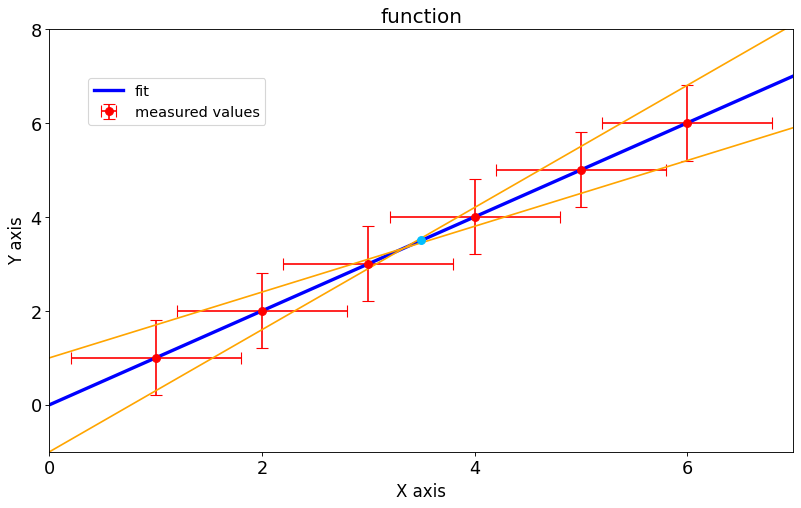

In [15]:
#linear fit with adjustable error
%reset -f
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt            #plot
from mpl_toolkits.mplot3d import Axes3D    #3D plot
from matplotlib import cm                  #colormaps
from scipy.optimize import curve_fit       #fitting

#Data
x_data=np.array([1,2,3,4,5,6])
x_error=np.array([0.8,0.8,0.8,0.8,0.8,0.8])
y_data=[1,2,3,4,5,6]
y_error=[0.8,0.8,0.8,0.8,0.8,0.8]

x_plot =np.linspace(0,10,1000)

#fiting function
fitfunc = lambda x,a,b: a*x +b

initial_guess=[1,0]
coeff, sigma = curve_fit(fitfunc, x_data, y_data, p0=initial_guess)
sigma = np.diag(sigma)

#modify uncertainties
sigma=[0.3,1.0]

print('coeff =',coeff,'\n','sigma =',sigma)

#median values
x_med=0;y_med=0
for i in range(0,len(x_data)):
    x_med += x_data[i]/len(x_data)
    y_med += y_data[i]/len(y_data)


#plot commands
fig, ax = plt.subplots(figsize=(12, 7), dpi= 80, facecolor='w', edgecolor='k')
ax.legend(fontsize=13, bbox_to_anchor=(0.95,0.95))
plt.title("function", fontsize=18)

#measured values
ax.errorbar(x_data,y_data,yerr=y_error,xerr=x_error,color="red", fmt='o', markersize=7, capsize=5,label="measured values")
#x/y-Median
ax.errorbar(x_med,y_med,color="deepskyblue", fmt='o', markersize=7, capsize=5)
#fit with uncertainties
ax.plot(x_plot,fitfunc(x_plot,coeff[0],coeff[1]),color="blue", markersize=7, label="fit",linewidth=3)
ax.plot(x_plot,fitfunc(x_plot,(coeff[0]-sigma[0]),(coeff[1]+sigma[1])),color="orange", markersize=7)
ax.plot(x_plot,fitfunc(x_plot,coeff[0]+sigma[0],coeff[1]-sigma[1]),color="orange", markersize=7)

ax.set_xticks([0,2,4,6])
ax.set_yticks([0,2,4,6,8])
ax.set_xlim(0,7)
ax.set_ylim(-1,8)
ax.set_xlabel('X axis', fontsize=15)
ax.set_ylabel('Y axis', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize=13, bbox_to_anchor=(0.3,0.9))
plt.gca().set_autoscale_on(False)
plt.show()

## fit data with curve_fit from scipy.optimize - arbitrary function

coeff = [20.76474815  0.13563852  3.80393851] 
 sigma = [-1.41426309e+14  1.23815368e-05 -3.28002262e+11]


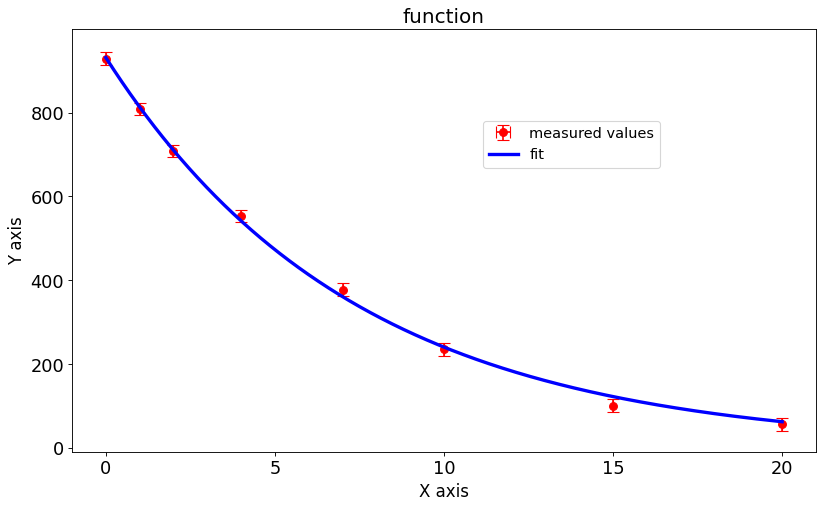

In [17]:
#graph fit
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib import cm
from scipy.optimize import curve_fit

#Data
x_data=np.array([0,1,2,4,7,10,15,20])
x_error=np.array([0,0,0,0,0,0,0,0])
y_data=[929.4,808.4,708.4,553.4,377.4,234.4,100.4,55.4]
y_error=[15,15,15,15,15,15,15,15]

x_plot =np.linspace(0,20,1000)

#fiting function
fitfunc = lambda x,a,b,c: a*np.exp(-b*x+c)

initial_guess=[1,0,1]
coeff, sigma = curve_fit(fitfunc, x_data, y_data, p0=initial_guess)
sigma = np.diag(sigma)

print('coeff =',coeff,'\n','sigma =',sigma)

#plot commands
fig, ax = plt.subplots(figsize=(12, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.title("function", fontsize=18)

#measured values
ax.errorbar(x_data,y_data,yerr=y_error,xerr=x_error,color="red", fmt='o', markersize=7, capsize=5,label="measured values")
#fit with uncertainties
ax.errorbar(x_plot,fitfunc(x_plot,coeff[0],coeff[1],coeff[2]),color="blue", markersize=7, capsize=5,label="fit",linewidth=3)
#ax.errorbar(x_plot,fitfunc(x_plot,(coeff[0]-sigma[0]),(coeff[1]+sigma[1])),color="orange", markersize=7, capsize=5,)
#ax.errorbar(x_plot,fitfunc(x_plot,coeff[0]+sigma[0],coeff[1]-sigma[1]),color="orange", markersize=7, capsize=5,)


ax.set_xticks([0,5,10,15,20])
ax.set_yticks([0,200,400,600,800])
ax.set_xlim(-1,21)
ax.set_ylim(-10,1000)
ax.set_xlabel('X axis', fontsize=15)
ax.set_ylabel('Y axis', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize=13, bbox_to_anchor=(0.8,0.8))
fig.gca().set_autoscale_on(False)
plt.show()